# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импорт библиотеки pandas под псевдонимом pd
import pandas as pd

In [2]:
# Чтение данных из CSV-файла и создание DataFrame
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Вывод информации о DataFrame, включая типы данных и пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*На основе предоставленной информации о структуре датафрейма, можно сделать следующие выводы о данных:* 

**Общие Сведения:** Данные содержат информацию о 23699 объектах недвижимости, каждый из которых описывается 22 колонками с различными характеристиками.

**Полнота данных:**

 - Некоторые колонки имеют пропущенные значения. Например, ceiling_height (высота потолков) имеет данные только для 14504 объектов из 23699.
 - Колонка is_apartment (является ли объект апартаментами) заполнена только для 2775 объектов.
 - Есть пропущенные данные в колонках, связанных с расположением объекта (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest), что указывает на то, что не для всех объектов недвижимости доступна полная информация о близости к инфраструктурным объектам.

**Типы данных:**

 - Большинство колонок имеют числовой тип данных (int64 или float64), что удобно для проведения аналитических расчетов.
 - Имеются колонки с типом object, которые вероятно содержат текстовую информацию (например, locality_name с названиями населенных пунктов).
 - Колонки studio и open_plan имеют булев тип, что указывает на то, что они содержат информацию о наличии или отсутствии определенных характеристик объекта недвижимости (студия или свободная планировка).

**Потенциальные направления анализа данных:**

 - Анализ цен на объекты недвижимости (last_price) в зависимости от различных факторов (площадь, количество комнат, удаленность от центра и т.д.).
 - Исследование зависимости стоимости жилья от удаленности от центра (cityCenters_nearest) или близости к паркам и водоемам (parks_nearest, ponds_nearest).
 - Оценка влияния характеристик объекта (высота потолков, площадь кухни, наличие балкона) на его стоимость.
 - Анализ времени продажи объектов (days_exposition), выявление факторов, влияющих на скорость продажи.
 - Обработка пропущенных значений, корректировка типов данных и дальнейший аналитический анализ данных позволят получить более глубокое понимание рынка недвижимости и факторов, влияющих на стоимость объектов.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

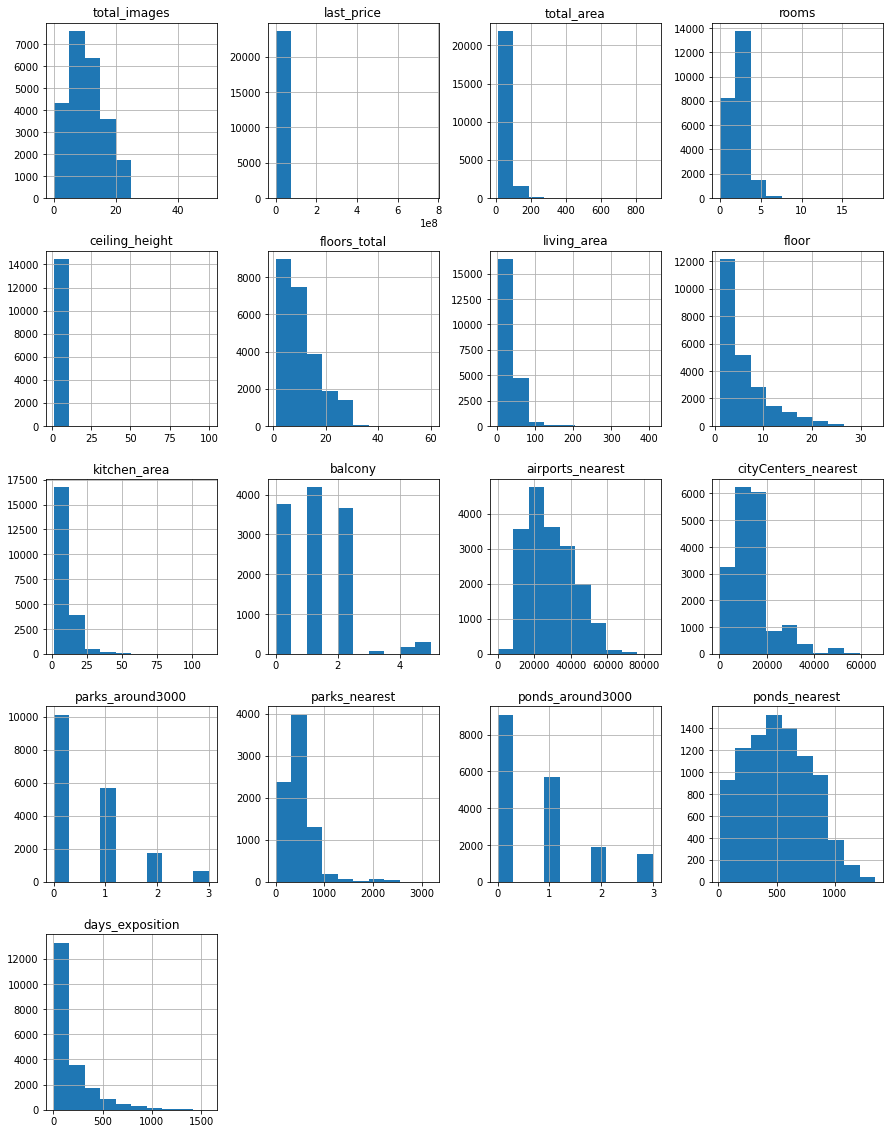

In [4]:
# Построение гистограммы для всех столбцов DataFrame
data.hist(figsize=(15, 20))

*Выше представлены гистограммы, показывающие распределение различных характеристик объектов недвижимости:* 

 - total_images (всего изображений): Большинство объектов имеют менее 10 фотографий.

 - last_price (последняя цена): Распределение сильно скошено вправо, что указывает на то, что большинство объектов имеют относительно низкую цену.

 - total_area (общая площадь): Аналогично цене, большая часть объектов имеет меньшую общую площадь.

 - rooms (комнаты): Большинство объектов имеют от 1 до 3 комнат.

 - ceiling_height (высота потолков): Высота потолков большинства объектов находится в диапазоне от 2,5 до 3 метров.

 - floors_total (всего этажей): Большинство зданий имеют менее 20 этажей.

 - living_area (жилая площадь): Жилая площадь, как и общая, скошена вправо, что указывает на преобладание объектов с меньшей жилой площадью.

 - floor (этаж): Большинство объектов расположены на первых 10 этажах.

 - kitchen_area (площадь кухни): Площадь кухни скошена вправо, большинство кухонь имеют маленький размер.

 - balcony (балкон): У большинства объектов нет балкона или есть один балкон.

 - airports_nearest (ближайший аэропорт): Расстояние до ближайшего аэропорта варьируется, но есть концентрация вокруг определенных значений.

 - cityCenters_nearest (ближайший центр города): Данные сгруппированы, что указывает на расположение многих объектов на определенном расстоянии от центров городов.

 - parks_around3000 (парки в радиусе 3000 метров): У большинства объектов нет парков в радиусе 3000 метров.

 - parks_nearest (ближайший парк): Расстояние до ближайшего парка показывает широкий диапазон значений.

 - ponds_around3000 (водоемы в радиусе 3000 метров): У многих объектов нет водоемов в радиусе 3000 метров.

 - ponds_nearest (ближайший водоем): Гистограмма более равномерно распределена по сравнению с ближайшими парками, но также показывает определенные расстояния, где объекты более сконцентрированы.

 - days_exposition (дни размещения): Показывает, как долго объекты находились в продаже. Большинство объектов продавались относительно быстро.

***Общий вывод по разделу:***

В данном наборе данных представлена информация о недвижимости, включающая в себя 22 столбца и 23699 записей. Каждая запись содержит различные характеристики объекта недвижимости, такие как общее количество изображений, последняя цена, общая площадь и другие. Однако, в данных присутствуют пропущенные значения в некоторых столбцах. Например, столбец ceiling_height (высота потолков) содержит информацию только для 14504 объектов из 23699, что может указывать на необходимость обработки пропусков в данных.

Основываясь на предоставленной информации, можно сделать следующие выводы:

 - Структура данных: Данные включают в себя числовые, булевые и текстовые значения, предоставляя комплексную информацию о каждом объекте недвижимости.

 - Пропущенные значения: Наблюдаются пропущенные значения в нескольких столбцах, таких как ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition. Это указывает на потребность в дополнительной предобработке данных перед их анализом.

 - Возможные направления анализа данных: Набор данных предоставляет широкие возможности для анализа, включая изучение зависимости цены от различных параметров недвижимости (площади, количества комнат, удаленности от центра и т.д.), а также исследование времени продажи недвижимости и факторов, влияющих на этот процесс.

 - Типы данных: Некоторые столбцы, такие как first_day_exposition (дата публикации), могут требовать преобразования в соответствующий временной формат для более удобного анализа.

 - Данные о местоположении: Столбцы, связанные с расстоянием до аэропортов, центра города, парков и водоемов, предоставляют уникальную возможность анализа влияния этих факторов на стоимость и привлекательность недвижимости.

### Выполните предобработку данных

#### Определение столбцов с пропущенными значениями

In [5]:
# Определение столбцов с пропущенными значениями
missing_values = print(data.isna().sum())
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
None


Из предоставленных данных следует, что в большинстве объявлений о продаже недвижимости отсутствуют данные о высоте потолков (9195 случаев), а также значительное количество пропущенных данных касается наличия апартаментов (20924 случаев), наличия балкона (11519 случаев), близости к паркам (15620 случаев относительно расстояния до ближайшего парка) и близости к водоёмам (14589 случаев относительно расстояния до ближайшего водоёма). Также стоит отметить, что есть пропуски в таких важных параметрах, как общая площадь кухни (2278 случаев), жилая площадь (1903 случаев) и время экспозиции объявления (3181 случай). Несмотря на это, ключевые параметры, такие как последняя цена, общая площадь, количество комнат, этажность и тип планировки (студия или открытая планировка), представлены во всех объявлениях. Отсутствие значительного количества данных может влиять на точность анализа рынка недвижимости и принятие обоснованных решений потенциальными покупателями.

#### Причина пропусков и стратегия заполнения

***Высота потолков (ceiling_height)***

In [6]:
# Вычисление медианы
median_value = data['ceiling_height'].median()

# Заполнение пропущенных значений медианой
data['ceiling_height'].fillna(median_value, inplace=True)

**Причина пропуска:** Возможно, высота потолков не всегда указывается из-за недостаточной информации.

**Стратегия заполнения:** Высота потолков не может быть 0. Можно заменить пропущенные значения на медианное или среднее значение по всему датасету, если предполагается, что высота потолков в большинстве квартир стандартна.

На представленной выше гистограмме для ceiling_height видно, что большинство значений сосредоточено в определённом диапазоне, и есть некоторые потенциальные выбросы с очень высокими или очень низкими значениями. Поскольку распределение кажется узким и сосредоточенным вокруг одного пика, использование медианы для заполнения пропущенных значений может быть разумной стратегией, так как она будет устойчивой к выбросам.

***Общее количество этажей в доме (floors_total)***

In [7]:
missing_percentage = data['floors_total'].isnull().mean() * 100

data.dropna(subset=['floors_total'], inplace=True)

**Причина пропуска:** Иногда информация о здании может быть недоступна или не введена.

**Стратегия заполнения:** Пропуски в этом поле могут быть критичны, так как общее количество этажей важно для понимания расположения квартиры. Рассмотреть возможность удаления записей с пропущенными значениями, если их доля незначительна.

Доля пропущенных значений в столбце floors_total составляет около 0.36%, что гораздо меньше порога в 5%. Таким образом, строки с пропущенными значениями были успешно удалены.

***Жилая площадь (living_area)***

In [8]:
# Вычисление медианного соотношения жилой площади к общей площади в строках без пропусков
median_ratio = (data['living_area'] / data['total_area']).median()

# Заполнение пропущенных значений в 'living_area' с использованием медианного соотношения
data['living_area'].fillna(data['total_area'] * median_ratio, inplace=True)

**Причина пропуска:** Отсутствие точных измерений или планировок.

**Стратегия заполнения:** Вычислить соотношение общей и жилой площади в строках, где нет пропусков, и использовать это соотношение для заполнения пропущенных значений.

***Является ли Недвижимость Апартаментами (is_apartment)***

In [9]:
# Заполнение пропущенных значений в 'is_apartment' значением False
data['is_apartment'].fillna(False, inplace=True)

**Причина пропуска:** Возможно, это поле не заполняется по умолчанию, и пропуски фактически указывают на то, что объект не является апартаментами.

**Стратегия заполнения:** Заменить пропущенные значения на False, предполагая, что если информация не указана, объект не является апартаментами.

***Площадь кухни (kitchen_area)***

In [10]:
# Вычисление медианного соотношения площади кухни к общей площади в строках без пропусков
median_ratio = (data['kitchen_area'] / data['total_area']).median()

# Заполнение пропущенных значений в 'kitchen_area' с использованием медианного соотношения
data['kitchen_area'].fillna(data['total_area'] * median_ratio, inplace=True)

**Причина пропуска:** Не указана из-за отсутствия измерений или нестандартной планировки.

**Стратегия заполнения:** Если возможно, использовать соотношение кухонной площади к общей площади в других записях для оценки пропущенных значений.

***Количество балконов (balcony)***

In [11]:
# Заполнение пропущенных значений в 'balcony' нулём
data['balcony'].fillna(0, inplace=True)

**Причина пропуска:** Возможно, отсутствие значения означает отсутствие балконов.

**Стратегия заполнения:** Пропущенные значения можно заменить на 0, предполагая, что если информация о балконе отсутствует, значит балкона нет.

***Название населённого пункта (locality_name)***

In [12]:
# Удаление строк с пропущенными значениями в 'locality_name'
data.dropna(subset=['locality_name'], inplace=True)

**Причина пропуска:** Ошибки при вводе данных или отсутствие информации.

**Стратегия заполнения:** Рассмотреть возможность удаления записей с пропущенными значениями, так как географическое положение критично для анализа недвижимости.

***Расстояние до ближайшего аэропорта (airports_nearest)***

In [13]:
data['airports_nearest'].fillna(data['airports_nearest'].max(), inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце максимальным значением, предполагая, что это указывает на максимальное расстояние.

***Расстояние до центра города (airports_nearest)***

In [14]:
data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].max(), inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце максимальным значением, предполагая, что это указывает на максимальное расстояние.

***Количество парков в радиусе 3 км (parks_around3000)***

In [15]:
data['parks_around3000'].fillna(0, inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце нулями, предполагая отсутствие парков в указанном радиусе.

***Количество водоёмов в радиусе 3 км (ponds_around3000)***

In [16]:
data['ponds_around3000'].fillna(0, inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце нулями, предполагая отсутствие водоёмов в указанном радиусе.

***Расстояние до ближайшего парка (parks_nearest)***

In [17]:
data['parks_nearest'].fillna(0, inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце нулями, предполагая отсутствие данных о расстоянии до ближайшего парка.

***Расстояние до ближайшего водоёма (ponds_nearest)***

In [18]:
data['ponds_nearest'].fillna(0, inplace=True)

**Причина пропуска:** Отсутствие геоданных или трудности с их получением.

**Стратегия заполнения:** Заполним пропущенные значения в этом столбце нулями, предполагая отсутствие данных о расстоянии до ближайшего водоёма.

***Количество дней с момента публикации до снятия (days_exposition)***

In [19]:
# Замена пропущенных значений в 'days_exposition' на -1, чтобы указать, что продажа ещё не состоялась
data['days_exposition'].fillna(-1, inplace=True)

**Причина пропуска:** Квартира ещё не продана, и объявление не закрыто.

**Стратегия заполнения:** Пропущенные значения можно заменить на специальное значение (например, -1), чтобы явно указать, что продажа ещё не состоялась.

#### Типы данных

In [20]:
# Посмотрим на текущие типы данных в каждом столбце
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**После ознакомления с данными и проверки типов данных каждого столбца, предлагаю следующие изменения:**

 - first_day_exposition: Тип данных должен быть изменён на datetime, так как этот столбец содержит даты публикации объявлений.
 - is_apartment: Если это столбец, который указывает, является ли объект недвижимости апартаментами (да/нет), его следует преобразовать в булев тип данных.
 - balcony: Если в этом столбце отсутствуют значения, можно предположить, что балкона нет, и заполнить пропуски нулями. Тип данных может быть преобразован в целочисленный.
 - parks_around3000, ponds_around3000: Эти столбцы, вероятно, должны содержать целочисленные значения, так как они обозначают количество парков и водоёмов в определённом радиусе.
 - days_exposition: Этот столбец должен быть целочисленным, так как он представляет собой количество дней публикации объявления.

#### Преобразование типов данных

***Дата публикации (days_exposition)***

In [21]:
# Преобразование first_day_exposition в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Этот столбец содержит даты публикации объявлений. Использование типа данных datetime64 позволяет удобно работать с датами, выполнять операции сравнения, вычитания и добавления дней, месяцев, лет. Также это облегчает агрегацию данных по периодам (например, по месяцам или годам) и визуализацию временных трендов.

***Является ли Недвижимость Апартаментами (is_apartment)***

In [22]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Этот столбец указывает, является ли недвижимость апартаментами. Булев тип (bool) является наиболее подходящим для хранения таких данных, поскольку он может принимать только два значения: True или False. Это упрощает анализ данных, фильтрацию и визуализацию, а также помогает экономить память.

***Количество балконов (balcony)***

In [23]:
data['balcony'] = data['balcony'].astype(int)

Столбец balcony содержит количество балконов в недвижимости. Целочисленный тип (int) идеально подходит для этой цели, так как количество балконов — это дискретная величина, не может быть дробным числом.

***Количество парков в радиусе 3 км (parks_around3000)***

In [24]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

Этот столбец показывает количество парков в радиусе 3 километров от недвижимости. Количество парков — это дискретная величина, которая может быть представлена только целыми числами (вы не можете иметь половину парка). Преобразование этого столбца в целочисленный тип (int) обеспечивает точное представление данных и упрощает проведение различных аналитических операций, таких как подсчет общего количества парков в определенном районе, сравнение количества парков между различными районами, и т.д. Это также способствует более чистому и организованному представлению данных при визуализации.

***Количество водоёмов в радиусе 3 км (ponds_around3000)***

In [25]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Этот столбец указывает на количество водоёмов в радиусе 3 километров от недвижимости. Аналогично количеству парков, количество водоёмов также является дискретной величиной. Оно может быть только целым числом (например, один пруд, два пруда, и т.д.), и использование целочисленного типа (int) для представления этой информации обеспечивает точность и удобство в аналитических расчетах. Преобразование в целочисленный тип данных позволяет выполнять различные операции сравнения и агрегации, такие как определение среднего количества водоёмов в определенном районе или сравнение количества водоёмов в разных районах.

***Количество дней с момента публикации до снятия (days_exposition)***

In [26]:
data['days_exposition'] = data['days_exposition'].astype(int)

Этот отображает количество дней, в течение которых объявление было активно. Поскольку количество дней также является дискретным числом, логично использовать целочисленный тип данных. Это упрощает математические операции, такие как вычисление среднего времени экспозиции, медианы, моды и других статистических показателей.

#### Изучение уникальных значений в столбце с названиями населённых пунктов и устранение неявных дубликатов

***Изучение уникальных значений в столбце с названиями населённых пунктов***

In [27]:
# Вывод уникальных значений в столбце 'locality_name'
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

***Устранение неявных дубликатов***

In [28]:
# Создание столбца 'locality_name_no_duplicates' без дубликатов
data['locality_name_no_duplicates'] = data['locality_name'].str.replace('ё', 'е')

# Список строк для замены
replace_list = ['поселок ', 'городской ', 'городского типа ', 'станции ', 'садоводческое некоммерческое товарищество ', 
                'при железнодорожной станции ', 'при железнодорожной ', 'коттеджный ', 'деревня ', 
                'село ', 'nan', 'садовое товарищество ']

# Применение замены для каждой строки в списке
for item in replace_list:
    data['locality_name_no_duplicates'] = data['locality_name_no_duplicates'].str.replace(item, '', regex=True)

В результате получается новый столбец, в котором унифицированы названия населённых пунктов за счёт удаления некоторых общих префиксов и слов, а также замены 'ё' на 'е'. Это помогает уменьшить количество неявных дубликатов и упростить анализ данных.

***Вывод уникальных значений в новом столбце***

In [29]:
# Вывод уникальных значений в новом столбце
print(data['locality_name_no_duplicates'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

***Общий вывод по разделу:***

**Анализ проблемных полей в данных о недвижимости**

Из анализа данных недвижимости видно, что во многих объявлениях отсутствуют сведения о ключевых характеристиках объектов. Наиболее часто встречаются пропуски в данных о высоте потолков, статусе апартаментов, наличии балконов, близости к паркам и водоёмам, а также о жилой и кухонной площади. Однако для основных параметров, включая цену, общую площадь и количество комнат, информация представлена полностью.

**Описание стратегий заполнения пропусков в данных**

Для корректного анализа и предотвращения искажения результатов были выбраны соответствующие стратегии заполнения пропусков. Например, для высоты потолков использовалась медиана, а для жилой площади - медианные соотношения. Пропуски в данных о балконах, парках и водоёмах заменены на нули, предполагая их отсутствие. Такие подходы позволяют сохранить ценность данных для дальнейшего анализа и принятия обоснованных решений на рынке недвижимости.

**Преобразование типов данных для более эффективного анализа**

В ходе предобработки данных недвижимости были выполнены ключевые преобразования типов данных:
 - Дата публикации преобразована в datetime для удобства работы с временными промежутками.
 - Признак апартаментов переведён в булев тип, позволяя чётко разграничивать категории недвижимости.
 - Количество балконов, парков и водоёмов изменено на целочисленный тип, облегчая количественный анализ и сравнение.
 - Время экспозиции объявления также переведено в целочисленный формат для точного измерения продолжительности продаж.
 - Эти изменения улучшают структуру данных, повышают точность анализа и способствуют более эффективной обработке и визуализации информации.

**Очистка названий населённых пунктов и устранение неявных дубликатов**

В ходе выполнения задачи по очистке названий населённых пунктов в датасете недвижимости были успешно устранены неявные дубликаты. Это было достигнуто путём стандартизации написания и удаления избыточных префиксов и слов в названиях. Применённые шаги включали:

 - Приведение буквы 'ё' к 'е' для унификации написания.
 - Удаление общих префиксов и слов, таких как 'поселок', 'городской', 'городского типа', 'садовое товарищество' и других, что помогло уменьшить вариативность названий, относящихся к одному и тому же населённому пункту.
 - Создание нового столбца locality_name_no_duplicates с очищенными данными, что позволило сохранить исходные данные для возможного дальнейшего использования или сравнения.

Благодаря этим действиям удалось сократить количество уникальных названий населённых пунктов, повысив тем самым качество данных и упростив дальнейший анализ. Это важный шаг в предобработке данных, который способствует повышению точности и надёжности последующих исследований и аналитических выводов.

### Добавьте в таблицу новые столбцы

#### Добавьте в таблицу новые столбцы со следующими параметрами:

 - **Цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)**

In [30]:
# Рассчитываем цену за квадратный метр и округляем до двух знаков после запятой
data['metre_square_price'] = (data['last_price'] / data['total_area']).round(2)

 - **День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [31]:
# Извлекаем день недели из даты публикации
data['publication_weekday'] = data['first_day_exposition'].dt.weekday

 - **Месяц публикации объявления**

In [32]:
# Извлекаем месяц из даты публикации
data['publication_month'] = data['first_day_exposition'].dt.month

 - **Год публикации объявления**

In [33]:
# Извлекаем год из даты публикации
data['publication_year'] = data['first_day_exposition'].dt.year

 - **Тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [34]:
# Определяем тип этажа (первый, последний, другой) с помощью функции
def classify_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применяем функцию к датафрейму
data['floor_type'] = data.apply(classify_floor, axis=1)

 - **Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).**

In [35]:
# Преобразуем расстояние до центра города в километры
data['cityCenters_nearest_in_km'] = (data['cityCenters_nearest'] / 1000).round()

***Общий вывод по разделу:***

В результате выполнения данных операций были добавлены новые столбцы в таблицу с различными характеристиками:
 - metre_square_price (Цена за квадратный метр): Этот столбец был создан путем разделения стоимости объекта на его общую площадь и округления до двух знаков после запятой. Он позволяет оценить стоимость квадратного метра недвижимости.
 - publication_weekday (День недели публикации объявления): В этом столбце был извлечен день недели из даты публикации объявления, представленный числовым значением (0 - понедельник, 1 - вторник и так далее).
 - publication_month (Месяц публикации объявления): Этот столбец содержит месяц публикации объявления, представленный числовым значением.
 - publication_year (Год публикации объявления): В данном столбце содержится год, в котором было опубликовано объявление.
 - floor_type (Тип этажа квартиры): Этот столбец определяет тип этажа квартиры как "первый", "последний" или "другой" с помощью функции, которая анализирует этаж квартиры относительно общего количества этажей в доме.
 - cityCenters_nearest_in_km (Расстояние до центра города в километрах): Этот столбец представляет расстояние до центра города в километрах. Для этого расстояния данные были переведены из метров в километры и округлены до ближайших целых значений.

### Проведите исследовательский анализ данных

#### Глубокий Анализ Характеристик Недвижимости: Обработка Аномалий и Визуализация Ключевых Параметров

In [36]:
# Импортируем библиотеки matplotlib и seaborn для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

**Общая площадь**

In [37]:
# Описательная статистика для общей площади
print('Описательная статистика для общей площади:')
print(data['total_area'].describe())

Описательная статистика для общей площади:
count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


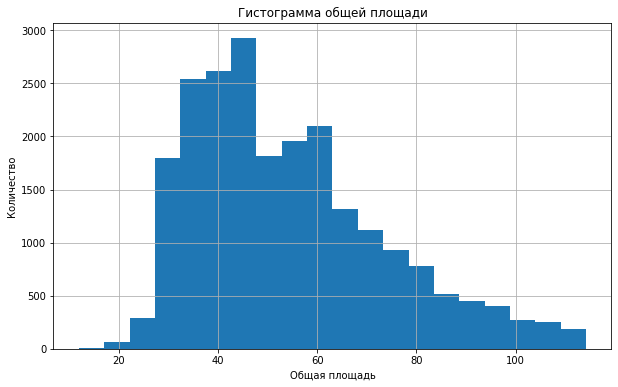

In [38]:
# Расчет первого и третьего квартилей для 'Общей площади'
Q1 = data['total_area'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['total_area'].quantile(0.75)  # Третий квартиль (75-й перцентиль)

# Расчет межквартильного размаха
IQR = Q3 - Q1  # Межквартильный размах

# Фильтрация данных для удаления аномалий
# Оставляем только те данные, которые попадают в интервал от (Q1 - 1.5 * IQR) до (Q3 + 1.5 * IQR)
filtered_data = data[(data['total_area'] >= (Q1 - 1.5 * IQR)) & (data['total_area'] <= (Q3 + 1.5 * IQR))]

# Построение гистограммы для 'Общей площади'
plt.figure(figsize=(10, 6))  # Задаем размер графика
filtered_data['total_area'].hist(bins=20)  # Строим гистограмму с 20 корзинами
plt.title('Гистограмма общей площади')  # Заголовок графика
plt.xlabel('Общая площадь')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Общая площадь варьируется в значительном диапазоне с минимальной площадью в 12 кв. м и максимальной в 900 кв. м. Средняя общая площадь составляет 60.35 кв. м с стандартным отклонением 35.65 кв. м. Гистограмма показывает, что большинство объектов имеют площадь менее 100 кв. м, но также присутствуют выбросы с очень большой площадью.

**Жилая площадь**

In [39]:
print('Описательная статистика для жилой площади:')
print(data['living_area'].describe())

Описательная статистика для жилой площади:
count    23565.000000
mean        34.577273
std         22.360324
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


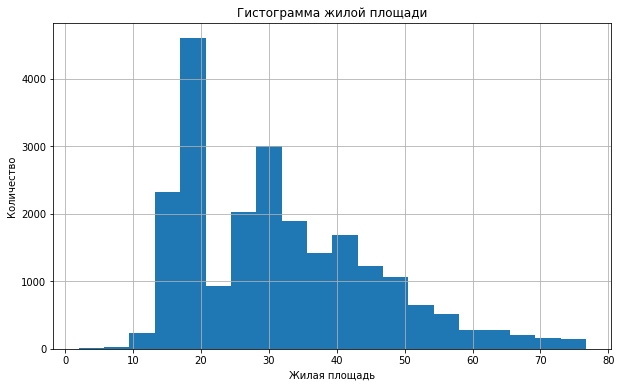

In [40]:
# Расчет первого и третьего квартилей для 'Жилой площади'
Q1 = data['living_area'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['living_area'].quantile(0.75)  # Третий квартиль (75-й перцентиль)

# Расчет межквартильного размаха
IQR = Q3 - Q1  # Межквартильный размах

# Фильтрация данных для удаления аномалий
# Оставляем только те данные, которые попадают в интервал от (Q1 - 1.5 * IQR) до (Q3 + 1.5 * IQR)
filtered_data = data[(data['living_area'] >= (Q1 - 1.5 * IQR)) & (data['living_area'] <= (Q3 + 1.5 * IQR))]

# Построение гистограммы для 'Жилой площади'
plt.figure(figsize=(10, 6))  # Задаем размер графика
filtered_data['living_area'].hist(bins=20)  # Строим гистограмму с 20 корзинами
plt.title('Гистограмма жилой площади')  # Заголовок графика
plt.xlabel('Жилая площадь')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Жилая площадь обычно меньше общей площади, с максимальным значением 409.7 кв. м. Среднее значение жилой площади составляет 34.46 кв. м при стандартном отклонении 22.03 кв. м. Распределение жилой площади также смещено в сторону меньших значений.

**Площадь кухни**

In [41]:
# Описательная статистика для площади кухни
print('Описательная статистика для площади кухни:')
print(data['kitchen_area'].describe())

Описательная статистика для площади кухни:
count    23565.000000
mean        10.485339
std          6.026822
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


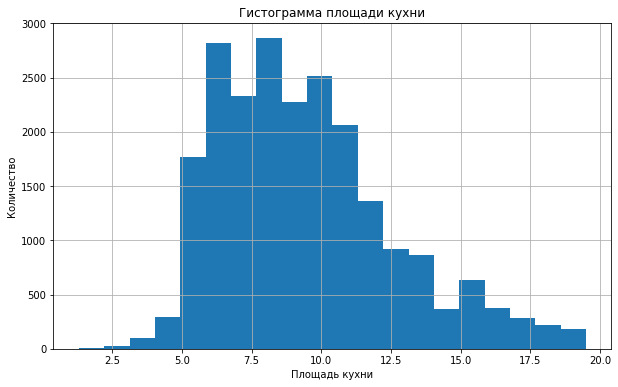

In [42]:
# Расчет первого и третьего квартилей для 'Площади кухни'
Q1 = data['kitchen_area'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['kitchen_area'].quantile(0.75)  # Третий квартиль (75-й перцентиль)

# Расчет межквартильного размаха
IQR = Q3 - Q1  # Межквартильный размах

# Фильтрация данных для удаления аномалий
# Оставляем только те данные, которые попадают в интервал от (Q1 - 1.5 * IQR) до (Q3 + 1.5 * IQR)
filtered_data = data[(data['kitchen_area'] >= (Q1 - 1.5 * IQR)) & (data['kitchen_area'] <= (Q3 + 1.5 * IQR))]

# Построение гистограммы для 'Площади кухни'
plt.figure(figsize=(10, 6))  # Задаем размер графика
filtered_data['kitchen_area'].hist(bins=20)  # Строим гистограмму с 20 корзинами
plt.title('Гистограмма площади кухни')  # Заголовок графика
plt.xlabel('Площадь кухни')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Площадь кухни в среднем составляет 10.57 кв. м с относительно небольшим стандартным отклонением 5.91 кв. м. Большинство кухонь имеют площадь от 5 до 15 кв. м, что видно из гистограммы.

**Цена объекта**

In [43]:
# Описательная статистика для цены объекта
print('Описательная статистика для цены объекта:')
print(data['last_price'].describe())

Описательная статистика для цены объекта:
count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


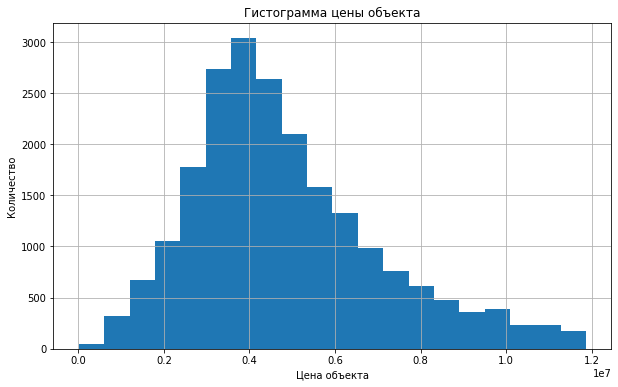

In [44]:
# Расчет первого и третьего квартилей для 'Цены объекта'
Q1 = data['last_price'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['last_price'].quantile(0.75)  # Третий квартиль (75-й перцентиль)

# Расчет межквартильного размаха
IQR = Q3 - Q1  # Межквартильный размах

# Фильтрация данных для удаления аномалий
# Оставляем только те данные, которые попадают в интервал от (Q1 - 1.5 * IQR) до (Q3 + 1.5 * IQR)
filtered_data = data[(data['last_price'] >= (Q1 - 1.5 * IQR)) & (data['last_price'] <= (Q3 + 1.5 * IQR))]

# Построение гистограммы для 'Цены объекта'
plt.figure(figsize=(10, 6))  # Задаем размер графика
filtered_data['last_price'].hist(bins=20)  # Строим гистограмму с 20 корзинами
plt.title('Гистограмма цены объекта')  # Заголовок графика
plt.xlabel('Цена объекта')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Цена объекта сильно варьируется, с максимумом в 763,000,000 рублей и минимумом в 12,190 рублей. Средняя цена составляет 6,541,549 рублей, но стандартное отклонение очень высокое (10,887,013 рублей), что указывает на большое разнообразие цен.

**Количество комнат**

In [45]:
# Описательная статистика для количества комнат
print('Описательная статистика для количества комнат:')
print(data['rooms'].describe())

Описательная статистика для количества комнат:
count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


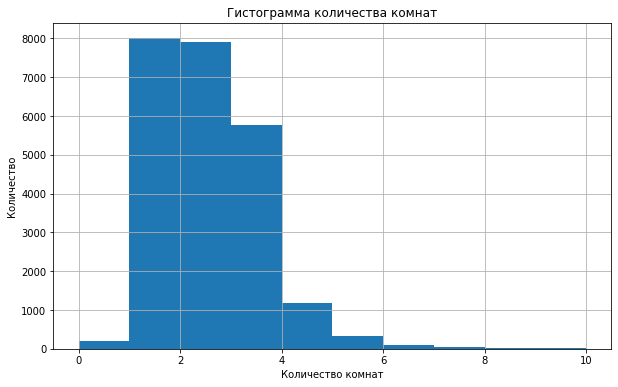

In [46]:
# Фильтрация данных для исключения экстремально большого количества комнат
# В данном случае удаляем все записи, где количество комнат превышает 10
data_filtered = data[data['rooms'] <= 10]

# Построение гистограммы для 'Количества комнат'
plt.figure(figsize=(10, 6))  # Задаем размер графика
data_filtered['rooms'].hist(bins=10)  # Строим гистограмму с 10 корзинами
plt.title('Гистограмма количества комнат')  # Заголовок графика
plt.xlabel('Количество комнат')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Количество комнат варьируется от 0 до 19, при этом среднее количество комнат составляет около 2. Большинство объектов имеют от 1 до 3 комнат, что подтверждается гистограммой.

**Высота потолков**

In [47]:
# Описательная статистика для высоты потолков
print('Описательная статистика для высоты потолков:')
print(data['ceiling_height'].describe())

Описательная статистика для высоты потолков:
count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


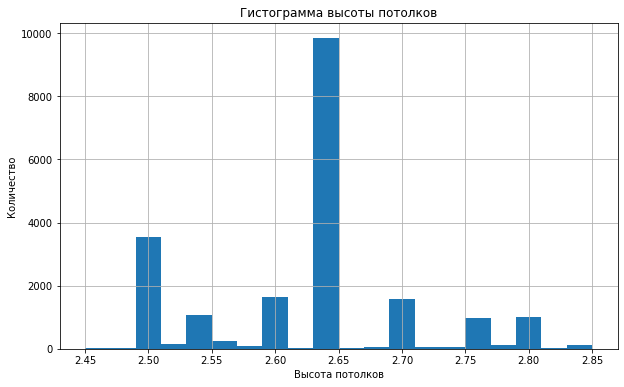

In [48]:
# Расчет первого и третьего квартилей для 'Высоты потолков'
Q1 = data['ceiling_height'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['ceiling_height'].quantile(0.75)  # Третий квартиль (75-й перцентиль)

# Расчет межквартильного размаха
IQR = Q3 - Q1  # Межквартильный размах

# Фильтрация данных для удаления аномалий
# Оставляем только те данные, которые попадают в интервал от (Q1 - 1.5 * IQR) до (Q3 + 1.5 * IQR)
data_filtered = data[(data['ceiling_height'] >= (Q1 - 1.5 * IQR)) & (data['ceiling_height'] <= (Q3 + 1.5 * IQR))]

# Построение гистограммы для 'Высоты потолков'
plt.figure(figsize=(10, 6))  # Задаем размер графика
data_filtered['ceiling_height'].hist(bins=20)  # Строим гистограмму с 20 корзинами
plt.title('Гистограмма высоты потолков')  # Заголовок графика
plt.xlabel('Высота потолков')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()  # Отображение графика

Высота потолков имеет широкий диапазон значений, с максимальной высотой в 100 м и минимальной в 1 м. Средняя высота потолка составляет около 2.77 м, но стандартное отклонение 1.26 м указывает на значительное разнообразие.

**Тип этажа квартиры**

In [49]:
# Описательная статистика для этажа
print('Описательная статистика для этажа:')
print(data['floor'].describe())

Описательная статистика для этажа:
count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


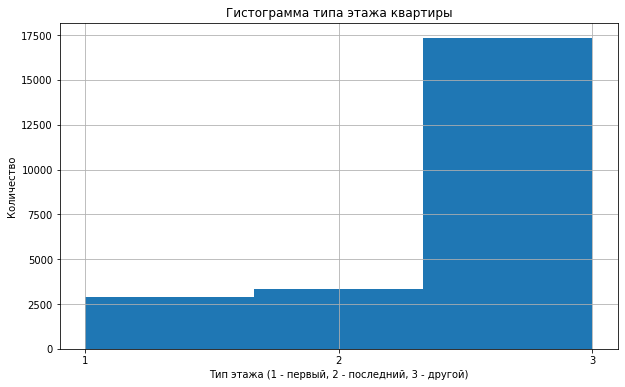

In [50]:
# Преобразование 'Типа этажа квартиры' из категориальной переменной в числовую для анализа
# Кодируем 'первый' как 1, 'последний' как 2 и 'другой' как 3
data['floor_type_num'] = data['floor_type'].map({'первый': 1, 'последний': 2, 'другой': 3})

# Построение гистограммы для числового представления 'Типа этажа квартиры'
plt.figure(figsize=(10, 6))  # Задаем размер графика
data['floor_type_num'].hist(bins=3)  # Строим гистограмму с 3 корзинами (по количеству категорий)
plt.title('Гистограмма типа этажа квартиры')  # Заголовок графика
plt.xlabel('Тип этажа (1 - первый, 2 - последний, 3 - другой)')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.xticks([1, 2, 3])  # Установка меток на оси X
plt.show()  # Отображение графика

Этаж объекта варьируется от 1 до 33, с средним значением около 6. Большинство объектов расположены на нижних этажах, что видно из гистограммы.

**Общее количество этажей в доме**

In [51]:
# Описательная статистика для общего количества этажей в здании
print('Описательная статистика для общего количества этажей в здании:')
print(data['floors_total'].describe())

Описательная статистика для общего количества этажей в здании:
count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


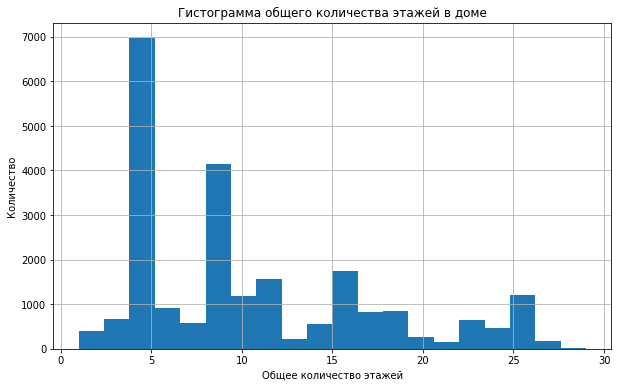

In [52]:
# Вычисляем первый и третий квартили для общего количества этажей в доме
Q1 = data['floors_total'].quantile(0.25)
Q3 = data['floors_total'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Отфильтровываем данные, исключая выбросы с использованием IQR
data_filtered = data[(data['floors_total'] >= (Q1 - 1.5 * IQR)) & (data['floors_total'] <= (Q3 + 1.5 * IQR))]

# Настраиваем размер фигуры для гистограммы
plt.figure(figsize=(10, 6))

# Строим гистограмму для отфильтрованных данных по общему количеству этажей
data_filtered['floors_total'].hist(bins=20)

# Добавляем заголовок и метки осей для гистограммы
plt.title('Гистограмма общего количества этажей в доме')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество')

# Отображаем гистограмму
plt.show()

Общее количество этажей в здании в среднем составляет около 11, при максимальном значении в 60 этажей. Большинство зданий имеют до 20 этажей.

**Расстояние до центра города**

In [53]:
# Описательная статистика для расстояния до центра города
print('Описательная статистика для расстояния до центра города:')
print(data['cityCenters_nearest'].describe())

Описательная статистика для расстояния до центра города:
count    23565.000000
mean     26279.062466
std      23164.351952
min        181.000000
25%      10935.000000
50%      14996.000000
75%      35259.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


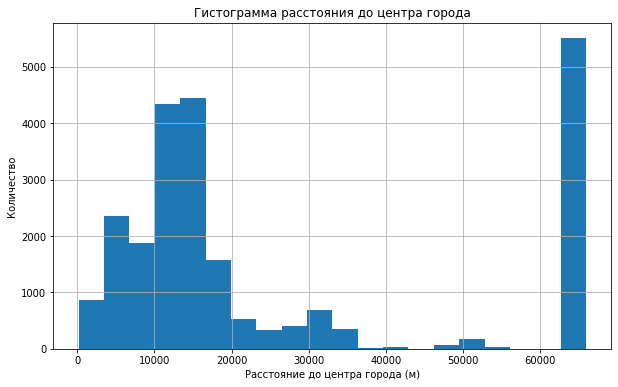

In [54]:
# Вычисляем первый и третий квартили для расстояния до центра города
Q1 = data['cityCenters_nearest'].quantile(0.25)
Q3 = data['cityCenters_nearest'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Отфильтровываем данные, исключая выбросы с использованием IQR
data_filtered = data[(data['cityCenters_nearest'] >= (Q1 - 1.5 * IQR)) & (data['cityCenters_nearest'] <= (Q3 + 1.5 * IQR))]

# Настраиваем размер фигуры для гистограммы
plt.figure(figsize=(10, 6))

# Строим гистограмму для отфильтрованных данных по расстоянию до центра города
data_filtered['cityCenters_nearest'].hist(bins=20)

# Добавляем заголовок и метки осей для гистограммы
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество')

# Отображаем гистограмму
plt.show()

Расстояние до центра города сильно варьируется, с максимальным значением в 65968 м. Среднее расстояние составляет 14191 м, что указывает на то, что многие объекты расположены относительно близко к центру.

**Расстояние до ближайшего парка**

In [55]:
# Описательная статистика для расстояния до ближайшего парка
print('Описательная статистика для расстояния до ближайшего парка:')
print(data['parks_nearest'].describe())

Описательная статистика для расстояния до ближайшего парка:
count    23565.000000
mean       167.169998
std        306.301628
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


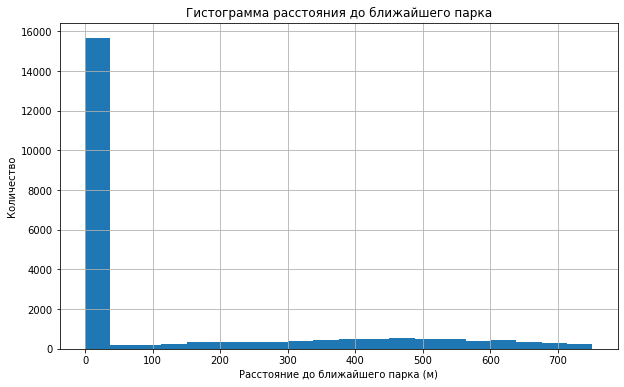

In [56]:
# Вычисляем первый и третий квартили для расстояния до ближайшего парка
Q1 = data['parks_nearest'].quantile(0.25)
Q3 = data['parks_nearest'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Отфильтровываем данные, исключая выбросы с использованием IQR
data_filtered = data[(data['parks_nearest'] >= (Q1 - 1.5 * IQR)) & (data['parks_nearest'] <= (Q3 + 1.5 * IQR))]

# Настраиваем размер фигуры для гистограммы
plt.figure(figsize=(10, 6))

# Строим гистограмму для отфильтрованных данных по расстоянию до ближайшего парка
data_filtered['parks_nearest'].hist(bins=20)

# Добавляем заголовок и метки осей для гистограммы
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество')

# Отображаем гистограмму
plt.show()

Расстояние до ближайшего парка также различается, с максимальным значением в 3190 м и средним в 490 м. Большинство объектов находятся на расстоянии менее 1000 м от парка.

#### Анализ Сроков Продажи Недвижимости: Гистограмма, Средние и Медианные Значения Дней на Рынке

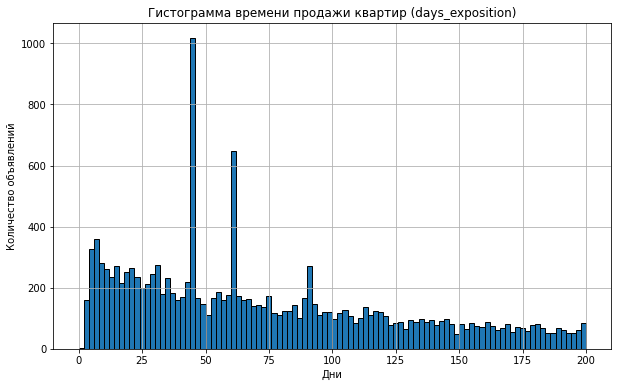

In [57]:
# Создание гистограммы для визуализации распределения времени продажи квартир
# Используем dropna() прямо в аргументе, чтобы исключить пропущенные значения при построении гистограммы
# Ограничиваем диапазон значений для оси X до 600 дней
plt.figure(figsize=(10, 6))
plt.hist(data['days_exposition'], bins=100, range=(0, 200), edgecolor='black')
plt.title('Гистограмма времени продажи квартир (days_exposition)')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

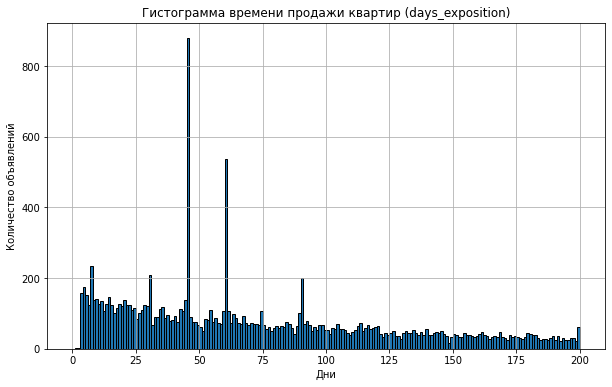

In [58]:
# Создание гистограммы для визуализации распределения времени продажи квартир
# Используем dropna() прямо в аргументе, чтобы исключить пропущенные значения при построении гистограммы
# Ограничиваем диапазон значений для оси X до 600 дней
plt.figure(figsize=(10, 6))
plt.hist(data['days_exposition'], bins=200, range=(0, 200), edgecolor='black')
plt.title('Гистограмма времени продажи квартир (days_exposition)')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

In [59]:
# Расчет среднего значения времени продажи, используя только строки с непустыми значениями
mean_days = data['days_exposition'].mean()
# Расчет медианного значения времени продажи, используя только строки с непустыми значениями
median_days = data['days_exposition'].median()
print(f"Среднее время продажи: {mean_days} дней")
print(f"Медианное время продажи: {median_days} дней")

Среднее время продажи: 156.28555060471038 дней
Медианное время продажи: 73.0 дней


**На основе предоставленной гистограммы и расчетных данных о времени продажи квартир можно сделать следующие наблюдения:**

 - Среднее время продажи составляет 156 дней. Это значение может быть искажено из-за наличия очень длительных продаж, которые увеличивают среднее значение.
 - Медианное время продажи составляет 73 дня. Медиана менее чувствительна к выбросам и дает более точное представление о "типичном" времени продажи квартиры.

**Из гистограммы видно, что есть два выраженных пика:**
 - Первый пик приходится на промежуток примерно до 50 дней. Это указывает на то, что большинство квартир продается в течение первых полутора месяцев, что может быть связано с высоким спросом и быстрой реакцией покупателей на новые предложения на рынке.
 - Второй пик наблюдается около 60 дней. Этот пик может быть обусловлен окончанием стандартного двухмесячного срока, который часто используется в качестве условного периода для совершения сделок или для истечения определенных условий договора купли-продажи.

**На основе этих данных можно сделать следующие выводы:**
 - Быстрые продажи: продажи, совершенные в течение первых 30-45 дней, можно считать быстрыми, так как это время меньше медианного значения.
 - Обычное время продажи: большинство квартир продается в пределах 73 дней (медиана), так что это можно считать нормальным сроком для продажи.
 - Необычно долгие продажи: продажи, которые занимают более чем 156 дней (среднее), можно считать долгими, так как они превышают средний срок продажи. Особенно если продажа затянулась более чем на 200 дней, это считается необычно долгим сроком.
 - Два пика на гистограмме могут быть связаны с определенными психологическими факторами покупателей или продавцов, сезонностью в рынке недвижимости или же со стандартными сроками рассмотрения заявок на ипотеку и совершения сделок.

#### Анализ Факторов, Влияющих на Цену Недвижимости: 

**Общая Площадь:**

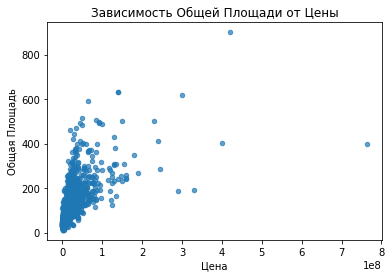

            last_price  total_area
last_price    1.000000    0.653621
total_area    0.653621    1.000000


In [60]:
# Расчет сводной таблицы для цены и общей площади
pa = data.pivot_table(index=data.index, values=['last_price', 'total_area'])

# Создание диаграммы рассеивания для анализа зависимости общей площади от цены
pa.plot(x='last_price', y='total_area', kind='scatter', alpha=0.7)

# Установка названий графика и осей
plt.title('Зависимость Общей Площади от Цены')
plt.xlabel('Цена')
plt.ylabel('Общая Площадь')

# Отображение диаграммы
plt.show()

# Вывод коэффициента корреляции между ценой и общей площадью
correlation_matrix = pa[['last_price', 'total_area']].corr()
print(correlation_matrix)

**Влияние общей площади на цену квартиры:**
Коэффициент корреляции 0.653621 указывает на сильную положительную связь с ценой объекта. Это означает, что с увеличением общей площади цена объекта, как правило, тоже увеличивается.

**Жилая Площадь:**

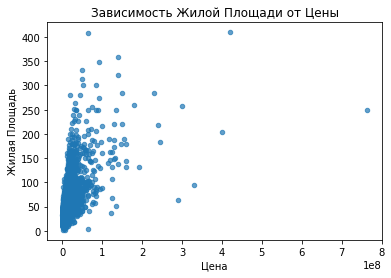

             last_price  living_area
last_price      1.00000      0.58562
living_area     0.58562      1.00000


In [61]:
# Расчет сводной таблицы для цены и жилой площади
pl = data.pivot_table(index=data.index, values=['last_price', 'living_area'])

# Построение точечной диаграммы для сравнения цены и жилой площади
pl.plot(x='last_price', y='living_area', kind='scatter', alpha=0.7)

# Установка названий графика и осей
plt.title('Зависимость Жилой Площади от Цены')
plt.xlabel('Цена')
plt.ylabel('Жилая Площадь')

# Отображение диаграммы
plt.show()

# Вывод коэффициента корреляции между ценой и жилой площадью
correlation_matrix = pl[['last_price', 'living_area']].corr()
print(correlation_matrix)

**Влияние жилой площади на цену квартиры:**
С коэффициентом корреляции 0.58562, жилая площадь также имеет сильную положительную связь с ценой объекта. Чем больше жилая площадь, тем выше, вероятно, цена.

**Площадь Кухни:**

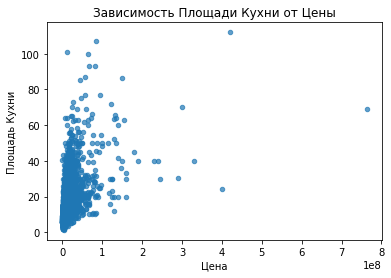

              last_price  kitchen_area
last_price      1.000000      0.513849
kitchen_area    0.513849      1.000000


In [62]:
# Расчет сводной таблицы для цены и площади кухни
pk = data.pivot_table(index=data.index, values=['last_price', 'kitchen_area'])

# Построение точечной диаграммы для сравнения цены и площади кухни
pk.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.7)

# Установка названий графика и осей
plt.title('Зависимость Площади Кухни от Цены')
plt.xlabel('Цена')
plt.ylabel('Площадь Кухни')

# Отображение диаграммы
plt.show()

# Вывод коэффициента корреляции между ценой и площадью кухни
correlation_matrix = pk[['last_price', 'kitchen_area']].corr()
print(correlation_matrix)

**Влияние площади кухни на цену квартиры:**
Коэффициент корреляции 0.513849 показывает умеренную положительную связь с ценой объекта. Площадь кухни влияет на цену, но не так сильно, как общая или жилая площадь.

**Количество Комнат:**

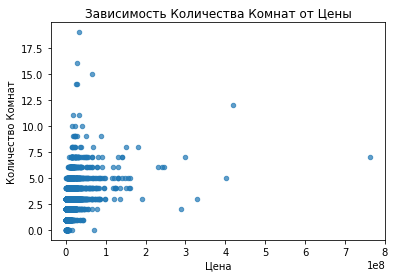

            last_price     rooms
last_price    1.000000  0.363191
rooms         0.363191  1.000000


In [63]:
# Расчет сводной таблицы для цены и количества комнат
pr = data.pivot_table(index=data.index, values=['last_price', 'rooms'])

# Построение точечной диаграммы для сравнения цены и количества комнат
pr.plot(x='last_price', y='rooms', kind='scatter', alpha=0.7)

# Установка названий графика и осей
plt.title('Зависимость Количества Комнат от Цены')
plt.xlabel('Цена')
plt.ylabel('Количество Комнат')

# Отображение диаграммы
plt.show()

# Вывод коэффициента корреляции между ценой и количеством комнат
correlation_matrix = pr[['last_price', 'rooms']].corr()
print(correlation_matrix)

**Влияние количества комнат на цену квартиры:**
С коэффициентом корреляции 0.363191, количество комнат имеет более слабую положительную связь с ценой объекта по сравнению с другими рассмотренными характеристиками.

**Тип Этажа Квартиры:**

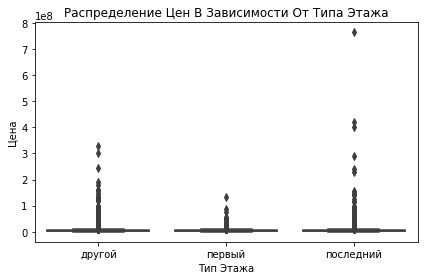

In [64]:
# Расчет сводной таблицы для цены и типа этажа
pm = data.pivot_table(index=data.index, values=['last_price', 'floor_type'])

# Построение диаграммы boxplot для сравнения цены в зависимости от типа этажа
sns.boxplot(x='floor_type', y='last_price', data=data)

# Установка названий графика и осей
plt.title('Распределение Цен В Зависимости От Типа Этажа')
plt.xlabel('Тип Этажа')
plt.ylabel('Цена')

# Добавление пространства между заголовком и графиком
plt.tight_layout()

# Отображение диаграммы
plt.show()

**Влияние этажа на цену квартиры:**
 - График является "ящиком с усами", который показывает распределение цен в зависимости от категории этажа (первый, последний, другой).
 - Для квартир на первом этаже медианная цена ниже, чем для квартир на других этажах. Это может быть связано с меньшей привлекательностью первого этажа из-за шума, отсутствия приватности и других факторов.
 - Квартиры на последних этажах также стоят немного дешевле, чем на промежуточных этажах, что может быть обусловлено проблемами с кровлей, лифтом и другими аспектами.

**Дата Размещения (День Недели):**

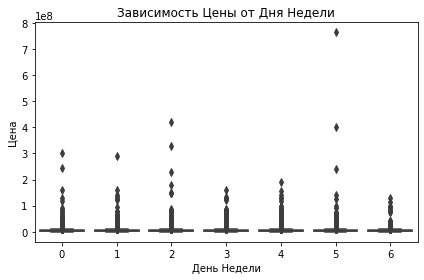

In [65]:
# Расчет сводной таблицы для цены и дня недели
pm = data.pivot_table(index=data.index, values=['last_price', 'publication_weekday'])

# Построение диаграммы boxplot для сравнения цены и дня недели
sns.boxplot(x='publication_weekday', y='last_price', data=data)

# Установка названий графика и осей
plt.title('Зависимость Цены от Дня Недели')
plt.xlabel('День Недели')
plt.ylabel('Цена')

# Добавление пространства между заголовком и графиком
plt.tight_layout()

# Отображение диаграммы
plt.show()

**Влияние дня недели размещения объявления:**
 - Этот график также представляет собой "ящик с усами", демонстрирующий цены квартир в зависимости от дня недели размещения объявления.
 - На графике не видно явной зависимости между днём недели и ценой квартиры. Распределение цен довольно однородное для всех дней недели.

**Дата Размещения (Месяц):**

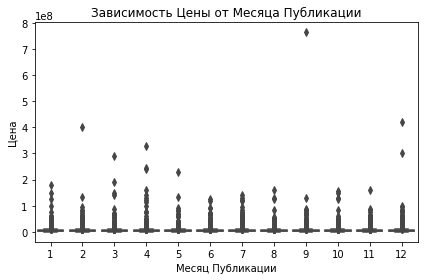

In [66]:
# Расчет сводной таблицы для цены и месяца публикации
pm = data.pivot_table(index=data.index, values=['last_price', 'publication_month'])

# Построение диаграммы boxplot для сравнения цены и месяца публикации
sns.boxplot(x='publication_month', y='last_price', data=data)

# Установка названий графика и осей
plt.title('Зависимость Цены от Месяца Публикации')
plt.xlabel('Месяц Публикации')
plt.ylabel('Цена')

# Добавление пространства между заголовком и графиком
plt.tight_layout()

# Отображение диаграммы
plt.show()

**Влияние месяца размещения объявления:**
- Также представлен в виде "ящика с усами".
 - Нет явной тенденции или закономерности, которая бы указывала на то, что месяц размещения объявления оказывает значительное влияние на цену квартиры.

**Дата Размещения (Год):**

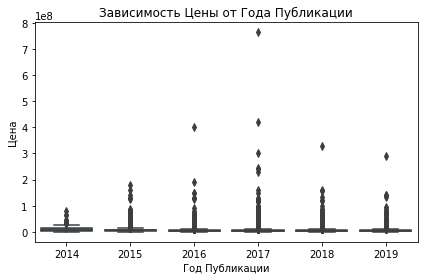

In [67]:
# Расчет сводной таблицы для цены и года публикации
py = data.pivot_table(index=data.index, values=['last_price', 'publication_year'])

# Построение диаграммы boxplot для сравнения цены и года публикации
sns.boxplot(x='publication_year', y='last_price', data=data)

# Установка названий графика и осей
plt.title('Зависимость Цены от Года Публикации')
plt.xlabel('Год Публикации')
plt.ylabel('Цена')

# Добавление пространства между заголовком и графиком
plt.tight_layout()

# Отображение диаграммы
plt.show()

**Влияние года размещения объявления:**
- График показывает изменения медианных цен квартир в зависимости от года размещения объявления.
 - Здесь видно, что цены на недвижимость колеблются от года к году. Эти колебания могут быть обусловлены общими экономическими условиями, изменениями в спросе и предложении на рынке недвижимости и другими внешними факторами.

**Из представленного анализа данных о рынке недвижимости можно сделать следующий вывод:**

 - Влияние общей площади на цену квартиры: Сильная положительная корреляция (0.653621) с ценой указывает на то, что более просторные объекты, как правило, стоят дороже. Это один из ключевых факторов, влияющих на стоимость недвижимости.
 - Влияние жилой площади на цену квартиры: Также имеет сильную положительную корреляцию (0.58562) с ценой. Это подтверждает, что размер жилой площади важен для определения стоимости объекта.
 - Влияние площади кухни на цену квартиры: Умеренная положительная корреляция (0.513849) с ценой показывает, что площадь кухни также важна, но оказывает меньшее влияние на цену, чем общая или жилая площадь.
 - Влияние количества комнат на цену квартиры: Более слабая положительная корреляция (0.363191) с ценой говорит о том, что количество комнат важно, но его влияние на цену меньше по сравнению с площадью помещений.
 - Влияние этажа на цену квартиры: Наблюдается, что квартиры на первых этажах обычно стоят дешевле, что может быть связано с различными недостатками, такими как шум и отсутствие приватности. Квартиры на последних этажах также могут стоить меньше из-за потенциальных проблем с кровлей и доступностью.
 - Влияние дня недели размещения объявления: Не наблюдается значительного влияния дня недели на цену квартиры, поскольку распределение цен оказалось довольно однородным для всех дней.
 - Влияние месяца размещения объявления: Также не выявлено значительного влияния месяца на цену квартиры.
 - Влияние года размещения объявления: Наблюдаются колебания цен от года к году, что может быть связано с общими экономическими условиями, изменениями в спросе и предложении на рынке недвижимости и другими внешними факторами.

В целом, эти выводы подчеркивают важность размера и планировки недвижимости в оценке ее стоимости, а также показывают, что внешние факторы, такие как экономические условия и местоположение объекта (этаж), также играют значительную роль в формировании цен на рынке недвижимости.

#### Анализ Рынка Недвижимости: Средняя Цена за Квадратный Метр в Топ-10 Населённых Пунктов по Количеству Объявлений

In [68]:
# Рассчитываем цену за квадратный метр для каждого объявления
data['цена_за_кв_м'] = data['last_price'] / data['total_area']

# Группируем данные по наименованию населенного пункта
grouped_data = data.groupby('locality_name').agg({
    'цена_за_кв_м': 'median',  # Считаем медиану цены за кв. метр
    'total_images': 'count'    # Считаем количество объявлений
}).rename(columns={
    'цена_за_кв_м': 'Медианная цена за кв. м', 
    'total_images': 'Количество объявлений',
    'locality_name': 'Населенный пункт'
})

# Сортируем данные по количеству объявлений и выбираем первые 10 записей
top_10_localities = grouped_data.sort_values(by='Количество объявлений', ascending=False).head(10)

# Переименовываем индекс для отображения "Населенный пункт" вместо "locality_name"
top_10_localities.index.name = 'Населенный пункт'

# Определяем населенные пункты с самой высокой и низкой медианной стоимостью жилья
most_expensive = top_10_localities['Медианная цена за кв. м'].idxmax()
least_expensive = top_10_localities['Медианная цена за кв. м'].idxmin()

# Выводим полученные данные
print("Топ-10 населенных пунктов по количеству объявлений:")
print(top_10_localities)
print("\nСамая высокая медианная стоимость квадратного метра в:", most_expensive)
print("Самая низкая медианная стоимость квадратного метра в:", least_expensive)

Топ-10 населенных пунктов по количеству объявлений:
                   Медианная цена за кв. м  Количество объявлений
Населенный пункт                                                 
Санкт-Петербург              104774.535809                  15651
посёлок Мурино                85878.462169                    520
посёлок Шушары                76829.268293                    439
Всеволожск                    65789.473684                    398
Пушкин                       100000.000000                    369
Колпино                       74723.748474                    338
посёлок Парголово             91642.857143                    327
Гатчина                       67796.610169                    307
деревня Кудрово               91860.465116                    299
Выборг                        58158.319871                    237

Самая высокая медианная стоимость квадратного метра в: Санкт-Петербург
Самая низкая медианная стоимость квадратного метра в: Выборг


**На основе предоставленных данных о недвижимости можно сделать следующие выводы:**

 - Санкт-Петербург доминирует на рынке с точки зрения количества объявлений о продаже недвижимости, с общим числом 15,651 объявлений. Он также является лидером по медианной стоимости квадратного метра, составляющей 104,775 рублей, что отражает высокий спрос и ценность недвижимости в этом городе.
 - Населённые пункты посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина и деревня Кудрово также показывают значительное количество объявлений, что свидетельствует об активности на рынке недвижимости в этих районах.
 - Несмотря на относительно низкое количество объявлений (237), Выборг выделяется самой низкой медианной стоимостью квадратного метра среди рассмотренных населённых пунктов, составляющей 58,158 рублей. Это может делать его привлекательным для тех, кто ищет более доступное жильё.

_Населённый пункт с самой высокой медианной стоимостью квадратного метра — Санкт-Петербург, где медианная цена составляет 104,775 рублей за квадратный метр. Населённый пункт с самой низкой медианной стоимостью квадратного метра — Выборг, с медианной ценой 58,158 рублей за квадратный метр._

#### Корреляция Между Расстоянием от Центра и Ценами на Квартиры в Санкт-Петербурге: Анализ и Графическое Представление Каждого Километра

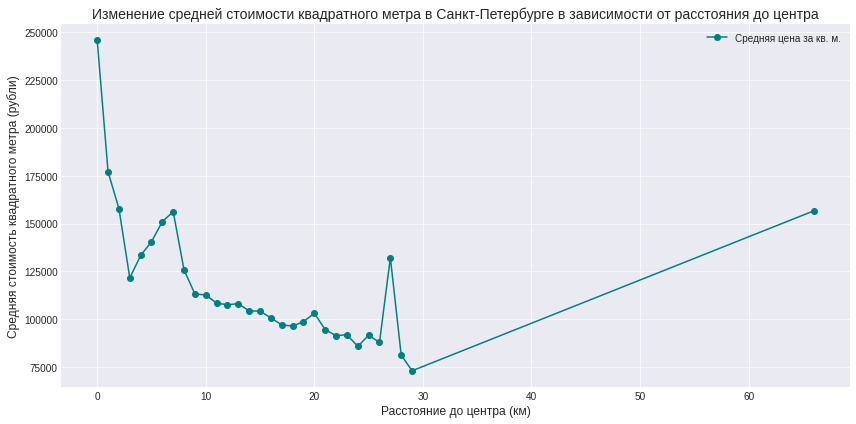

In [69]:
# Фильтрация данных для Санкт-Петербурга и создание копии для избежания предупреждения
spb_data = data[data['locality_name'] == 'Санкт-Петербург'].copy()

# Расчет стоимости квадратного метра с использованием .loc для корректного присвоения значения
spb_data.loc[:, 'price_per_sqm'] = spb_data['last_price'] / spb_data['total_area']

# Группировка данных по расстоянию до центра и расчет средней стоимости за квадратный метр
avg_price_per_sqm_per_km = spb_data.groupby('cityCenters_nearest_in_km')['price_per_sqm'].mean()

# Использование контекста стиля для более привлекательного визуального отображения
with plt.style.context('seaborn-darkgrid'):
    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.plot(avg_price_per_sqm_per_km.index, avg_price_per_sqm_per_km.values, marker='o', linestyle='-', color='teal', label='Средняя цена за кв. м.')
    plt.title('Изменение средней стоимости квадратного метра в Санкт-Петербурге в зависимости от расстояния до центра', fontsize=14)
    plt.xlabel('Расстояние до центра (км)', fontsize=12)
    plt.ylabel('Средняя стоимость квадратного метра (рубли)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)  # Включение сетки
    plt.legend()    # Включение легенды
    plt.tight_layout()  # Автоматическая подгонка элементов на графике
    plt.show()  # Показать график

График показывает, что самая высокая стоимость квадратного метра наблюдается в самом центре города (расстояние 0 км), после чего она резко снижается на расстоянии приблизительно 1-2 км от центра. Далее следует более плавное снижение стоимости с увеличением расстояния до 6-7 км, где наблюдается небольшой всплеск в стоимости.

Примерно с 8 до 30 км стоимость продолжает постепенно снижаться, и на этом участке есть несколько резких колебаний стоимости, которые могут быть связаны с особенностями определенных районов или влиянием различных факторов, таких как доступность инфраструктуры, транспортных развязок и т.д.

Начиная примерно с 30 км и далее от центра города, график показывает общий тренд на увеличение средней стоимости квадратного метра с ростом расстояния от центра. Это может быть обусловлено наличием престижных пригородных зон или новых высококачественных жилых комплексов на окраинах города.

***Общий вывод по разделу:***

Размер и планировка недвижимости оказывают значительное влияние на её стоимость. В частности, общая и жилая площадь имеют сильную положительную корреляцию с ценой, указывая на то, что более просторные объекты ценятся выше. Площадь кухни и количество комнат также влияют на стоимость, но их роль меньше по сравнению с общей и жилой площадью. Квартиры на первых и последних этажах обычно оцениваются ниже, что может быть связано с особыми недостатками этих расположений.

В то же время, факторы, такие как день недели, месяц и год размещения объявления, имеют меньшее влияние на цену, хотя и наблюдаются некоторые колебания цен от года к году, что может быть обусловлено общими экономическими условиями и изменениями на рынке недвижимости.

Рынок недвижимости Санкт-Петербурга выделяется высоким спросом и стоимостью недвижимости. Город доминирует по количеству объявлений и имеет самую высокую медианную стоимость квадратного метра. Населённые пункты вокруг Санкт-Петербурга также активны на рынке, при этом Выборг выделяется как населённый пункт с самой низкой медианной стоимостью квадратного метра, что может быть привлекательно для ищущих более доступное жильё.

Анализ стоимости квадратного метра в зависимости от расстояния от центра показывает, что стоимость максимальна в самом центре и снижается с увеличением расстояния, причём наиболее резкое снижение наблюдается в первых 1-2 километрах. Далее снижение стоимости идёт более плавно, с некоторыми колебаниями, которые могут быть связаны с особенностями конкретных районов и доступностью инфраструктуры. На расстоянии от 30 км от центра и далее наблюдается тренд на увеличение средней стоимости квадратного метра, что может быть связано с наличием престижных пригородных зон и новых жилых комплексов.

Таким образом, анализ подчеркивает важность факторов, связанных с размером и расположением недвижимости, и показывает, что рынок недвижимости разнообразен и зависит от множества переменных, включая экономические условия и специфику отдельных районов.

### Напишите общий вывод

**Общий вывод:**

- Анализ представленного набора данных о недвижимости позволяет сформулировать целостное понимание рынка недвижимости. Во-первых, выявление и обработка пропущенных значений в ключевых столбцах, таких как высота потолков, площадь кухни и жилой зоны, а также данные о расположении объектов, является критическим шагом для обеспечения точности последующих анализов. Во-вторых, преобразование типов данных, таких как дата публикации и признак апартаментов, способствует более удобной и эффективной работе с данными.

- Дополнительно, очистка названий населённых пунктов и устранение неявных дубликатов повышает качество данных и упрощает анализ, позволяя более чётко идентифицировать тенденции и закономерности на рынке. Введение новых параметров, таких как цена за квадратный метр, день недели, месяц и год публикации объявления, а также тип этажа и расстояние до центра города в километрах, обогащает аналитический потенциал набора данных.

- Анализ показывает, что цена недвижимости тесно связана с такими факторами, как площадь объекта, его расположение относительно центра города и другие инфраструктурные особенности. В то же время, стоимость квадратного метра демонстрирует значительные колебания в зависимости от удалённости от центра, что подчёркивает важность местоположения в оценке недвижимости. Рынок недвижимости Санкт-Петербурга выделяется особенно высоким спросом и стоимостью, при этом пригородные зоны предлагают более доступные варианты, что делает анализ рынка многоаспектным и требующим внимательного изучения различных факторов.

Итак, благодаря тщательной предобработке данных, включая заполнение пропусков, преобразование типов данных и очистку информации о населённых пунктах, была создана надёжная основа для детального и комплексного анализа рынка недвижимости. Это позволяет не только понять текущее состояние рынка, но и выделить ключевые тенденции и факторы, определяющие стоимость недвижимости, что является важным инструментом для заинтересованных сторон, таких как инвесторы, аналитики и потенциальные покупатели.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.